# BREAST CANCER PREDICTION

#### Problem statement:
           
Breast cancer stands as the prevailing form of cancer among women on a global scale. It constitutes a quarter of all cancer instances and impacted more than a million individuals in the single year of 2015. Its onset occurs as cells within the breast commence an unregulated proliferation (Breast Cancer Dataset, n.d.). Breast tumor diagnosis and categorization are critical for effective medical treatment and results for patients. The goal of this project is to create a machine-learning model that can help physicians diagnose breast cancer by analyzing medical imaging data.

#### Importing required libraries

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import std
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import median_abs_deviation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [204]:
#import the data
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis

In [205]:
# check the sum of missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [206]:
df.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [207]:
#Mapping the strings to numbers
df.diagnosis = df["diagnosis"].map({'M': 0, 'B': 1})

In [208]:
feature_columns=(['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [209]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

C:\Users\kurap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

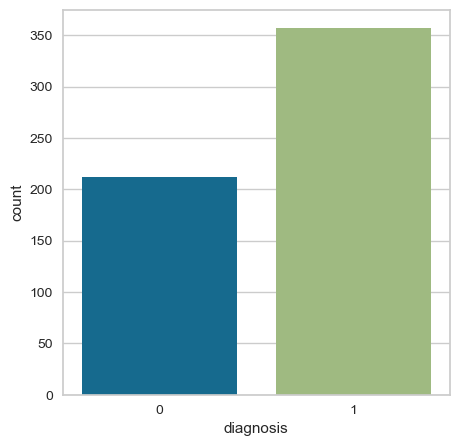

In [210]:
sns.countplot(df['diagnosis'])

### Feature Importance

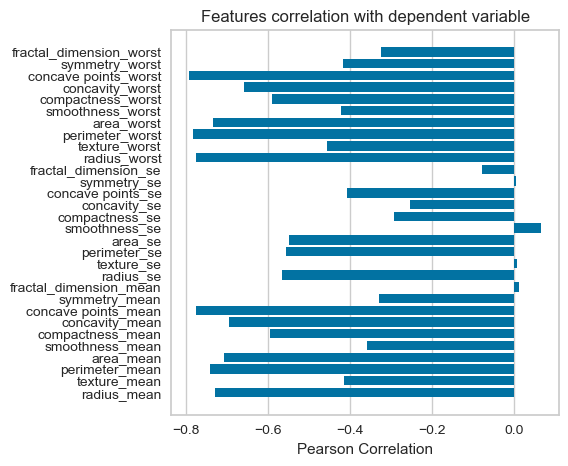

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [211]:
#Find the feature importance which is used in modelling against the target variable
from yellowbrick.target import FeatureCorrelation

a, b= df[feature_columns], df['diagnosis']
feature = np.array(feature_columns)
feature_importance= FeatureCorrelation(labels=feature)
plt.rcParams['figure.figsize']=(5,5)
feature_importance.fit(a, b)
feature_importance.show()

Deleting columns which have low collinearity as per abover pearson correlation diagram.


### DATA PREPARATION 

In [212]:
#Dropping columns whose threshold is less than -0.6

dataframe = df.drop(['radius_worst','perimeter_worst', 'area_worst','compactness_worst', 'concavity_worst', 'concave points_worst',
                     'radius_mean','perimeter_mean', 'area_mean','concave points_mean','concavity_mean'], axis=1)

In [213]:
feature_columns1=([ 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean',   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

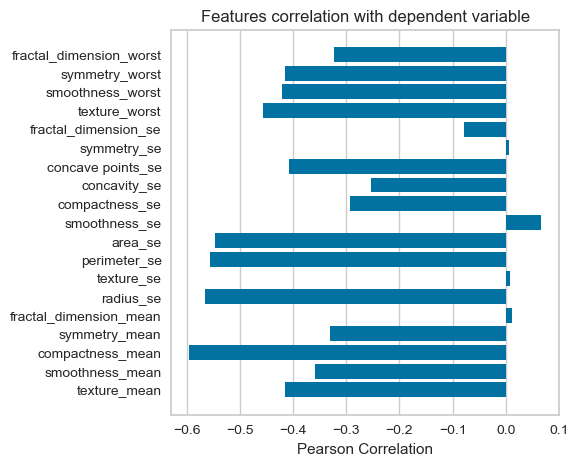

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [214]:
#Pearson correlation after dropping less correlated features

a, b= dataframe[feature_columns1], dataframe['diagnosis']
feature = np.array(feature_columns1)
feature_importance= FeatureCorrelation(labels=feature)
plt.rcParams['figure.figsize']=(5,5)
feature_importance.fit(a, b)
feature_importance.show()

In [215]:
#Dropping columns further whose threshold is less than -0.5

dataframe1 = dataframe.drop(['compactness_mean','radius_se','perimeter_se','area_se'], axis=1)

In [216]:
feature_columns2=([ 'texture_mean', 'smoothness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

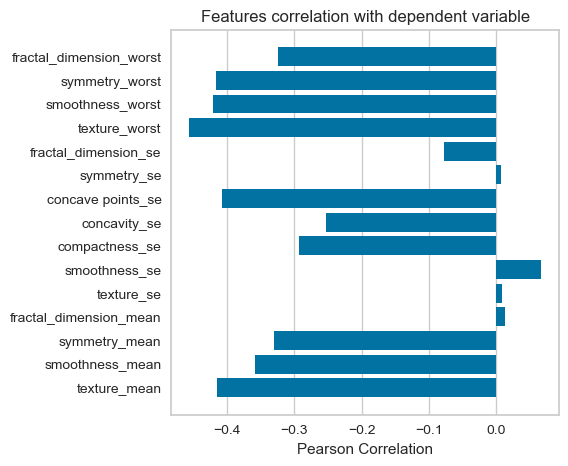

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [217]:
#Pearson correlation after dropping less correlated features

a, b= dataframe[feature_columns2], dataframe['diagnosis']
feature = np.array(feature_columns2)
feature_importance= FeatureCorrelation(labels=feature)
plt.rcParams['figure.figsize']=(5,5)
feature_importance.fit(a, b)
feature_importance.show()

In [218]:
#checking for outliers after dropping the unwanted columns
dataframe1.describe()

,id,diagnosis,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,19.289649,0.096360,0.181162,0.062798,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,25.677223,0.132369,0.290076,0.083946
std,1.250206e+08,0.483918,4.301036,0.014064,0.027414,0.007060,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,6.146258,0.022832,0.061867,0.018061
min,8.670000e+03,0.000000,9.710000,0.052630,0.106000,0.049960,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,12.020000,0.071170,0.156500,0.055040
25%,8.692180e+05,0.000000,16.170000,0.086370,0.161900,0.057700,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,21.080000,0.116600,0.250400,0.071460
50%,9.060240e+05,1.000000,18.840000,0.095870,0.179200,0.061540,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,25.410000,0.131300,0.282200,0.080040
75%,8.813129e+06,1.000000,21.800000,0.105300,0.195700,0.066120,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,29.720000,0.146000,0.317900,0.092080
max,9.113205e+08,1.000000,39.280000,0.163400,0.304000,0.097440,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,49.540000,0.222600,0.663800,0.207500


In [219]:
dataframe1.shape

(569, 17)

# Visualizations to check the correlation between dependent (diagnosis) and independent variables which are highly correlated

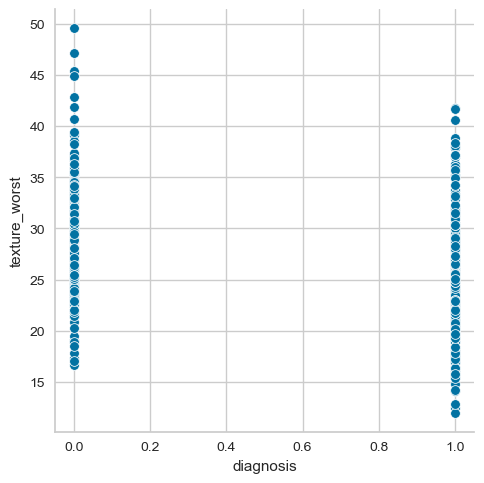

In [220]:
#Diagnosis vs radius_se
sns.relplot(x='diagnosis', y= 'texture_worst',data=dataframe1)

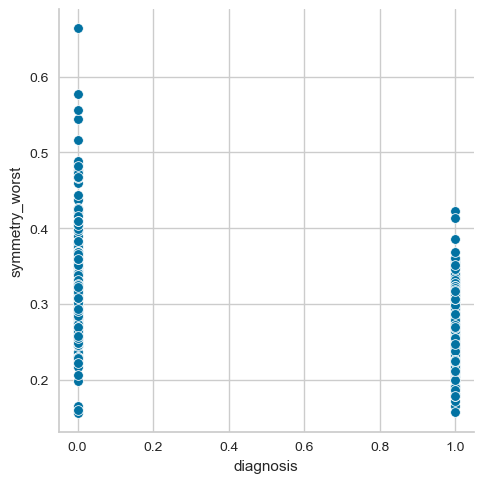

In [221]:
#Diagnosis vs radius_se
sns.relplot(x='diagnosis', y= 'symmetry_worst',data=dataframe1)

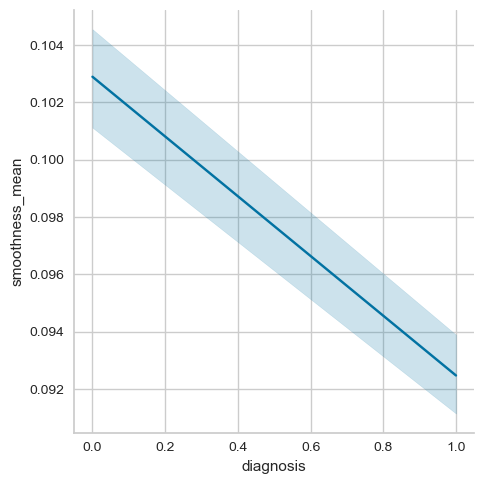

In [222]:
sns.relplot(x='diagnosis', y= 'smoothness_mean',kind='line', data=dataframe1)

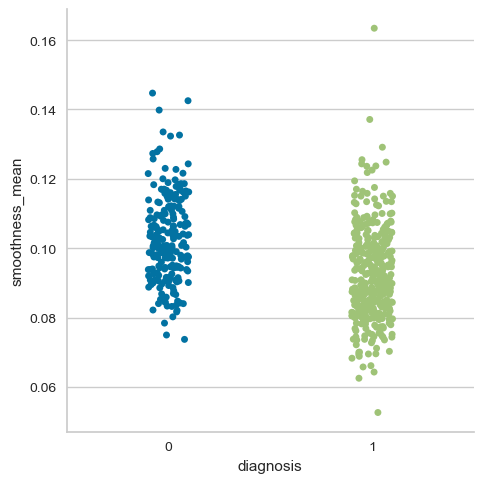

In [223]:
sns.catplot(x='diagnosis', y= 'smoothness_mean', data=dataframe1)

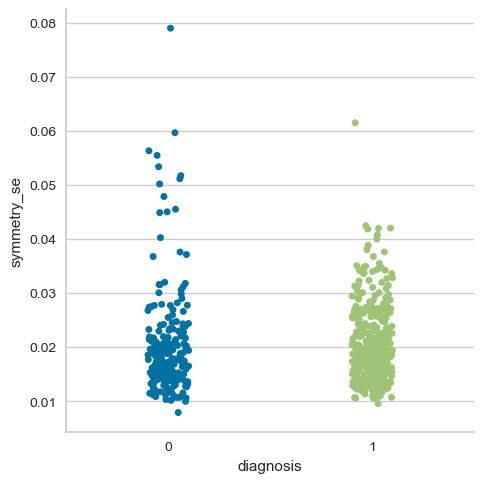

In [224]:
sns.catplot(x='diagnosis', y= 'symmetry_se', data=dataframe1)

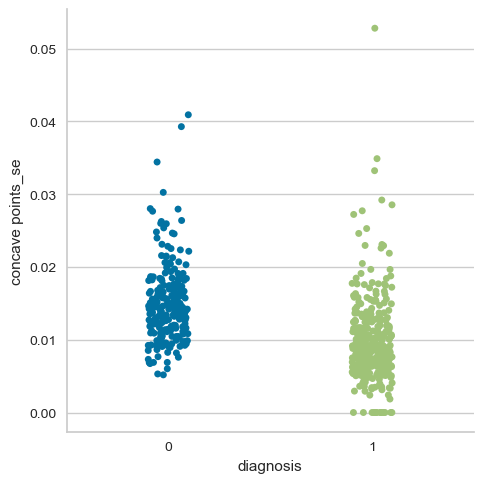

In [225]:
sns.catplot(x='diagnosis', y= 'concave points_se', data=dataframe1)

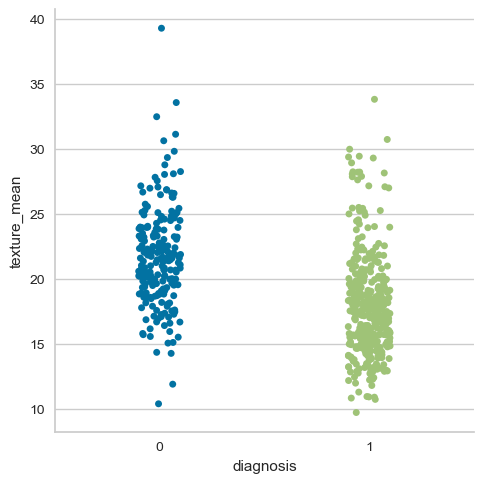

In [226]:
sns.catplot(x='diagnosis', y= 'texture_mean', data=dataframe1)

### Standardization

Calculating median and standard deviation of the data

In [227]:
for i in feature_columns2:
  dataframe1['median_abs_deviation_' +i] = median_abs_deviation(dataframe1[i])

In [228]:
for i in feature_columns2:
  dataframe1['standard_deviation_' +i] = std(dataframe1[i])

In [229]:
for i in  feature_columns2:
    print(i)
    dropgreater = dataframe1[ (dataframe1[i] > dataframe1[i].median()+3*dataframe1['median_abs_deviation_' +i]) | (dataframe1[i] > dataframe1[i].mean()+3*dataframe1['standard_deviation_' +i] ) ].index
    dropless = dataframe1[ (dataframe1[i].median() < dataframe1[i]-3*dataframe1['median_abs_deviation_' +i]) | (dataframe1[i] <dataframe1[i].mean()- 3*dataframe1['standard_deviation_' +i] ) ].index
    print("less drop" + str(len(dropgreater)))
    print("great drop" +str(len(dropless)))
    dataframe1.drop(dropgreater)
    dataframe1.drop(dropless)

texture_mean
less drop28
great drop28
smoothness_mean
less drop15
great drop16
symmetry_mean
less drop29
great drop29
fractal_dimension_mean
less drop35
great drop35
texture_se
less drop40
great drop40
smoothness_se
less drop51
great drop51
compactness_se
less drop61
great drop61
concavity_se
less drop47
great drop47
concave points_se
less drop38
great drop38
symmetry_se
less drop56
great drop56
fractal_dimension_se
less drop51
great drop51
texture_worst
less drop15
great drop15
smoothness_worst
less drop25
great drop25
symmetry_worst
less drop37
great drop37
fractal_dimension_worst
less drop45
great drop45


# TRAIN_TEST SPLIT

In [230]:
train, test_eval = train_test_split(dataframe1, test_size=0.2)

In [231]:
# Train_Test split
test, eval = train_test_split(test_eval, test_size=0.3)

In [232]:
train.describe

<bound method NDFrame.describe of            id  diagnosis  texture_mean  smoothness_mean  symmetry_mean  \
432    908194          0         19.54          0.11330         0.1724   
21    8510824          1         12.44          0.10240         0.1815   
350    899187          1         17.07          0.07561         0.1671   
181    873593          0         26.57          0.11410         0.2395   
64   85922302          0         23.84          0.11220         0.1905   
..        ...        ...           ...              ...            ...   
63     859196          1         13.86          0.07721         0.2341   
428  90769601          1         16.62          0.08151         0.1511   
229    881861          0         22.33          0.10880         0.2123   
398    904302          1         14.83          0.07741         0.1535   
135    868202          0         22.47          0.09055         0.1585   

     fractal_dimension_mean  texture_se  smoothness_se  compactness_se  \
432

In [233]:
test_eval.describe

<bound method NDFrame.describe of            id  diagnosis  texture_mean  smoothness_mean  symmetry_mean  \
69     859487          1         16.49          0.09831         0.1590   
446   9110732          0         28.03          0.09997         0.1713   
194  87556202          0         23.21          0.10440         0.1737   
212   8810703          0         18.47          0.11420         0.1648   
102    862965          1         20.52          0.08013         0.1739   
..        ...        ...           ...              ...            ...   
41     855563          0         21.35          0.12270         0.1895   
76    8610629          1         10.94          0.12910         0.2403   
529    918465          1         13.44          0.11000         0.1657   
145    869476          1         14.65          0.11520         0.1995   
168   8712766          0         24.68          0.10490         0.1538   

     fractal_dimension_mean  texture_se  smoothness_se  compactness_se  \
69 

Scaling

In [234]:
for i in feature_columns2:
  print(i)
  dataframe1[i+"_standard"] = scale(dataframe1[i])

texture_mean
smoothness_mean
symmetry_mean
fractal_dimension_mean
texture_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
texture_worst
smoothness_worst
symmetry_worst
fractal_dimension_worst


In [235]:
pd.DataFrame(dataframe1['diagnosis']).value_counts()

diagnosis
1            357
0            212
dtype: int64

# Classification Models - Logistic Regression

Binary classification model used is Logistic Regression

In [236]:
LR = linear_model.LogisticRegression(class_weight='balanced')

In [237]:
X_train = train.loc[:, feature_columns2]
Y_train = train['diagnosis']

In [238]:
X_test = test.loc[:, feature_columns2]
Y_test = test['diagnosis']

In [239]:
X_eval = eval.loc[:, feature_columns2]
Y_eval = eval['diagnosis']

In [240]:
LR.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

In [241]:
print("accuracy "+ str(accuracy_score(Y_test,LR.predict(X_test))))
print("precision "+ str(precision_score(Y_test,LR.predict(X_test))))
print("recall "+ str(recall_score(Y_test,LR.predict(X_test))))
print("f1 "+ str(f1_score(Y_test,LR.predict(X_test))))

accuracy 0.6835443037974683
precision 0.7659574468085106
recall 0.72
f1 0.7422680412371133


 Accuracy obtained using logistic regression binary classification model is 77%

In [242]:
reg_unbalanced = linear_model.LogisticRegression()
reg_unbalanced.fit(X_train, Y_train)

LogisticRegression()

Calculating all metrics

In [243]:
print("accuracy "+ str(accuracy_score(Y_test,reg_unbalanced.predict(X_test))))
print("precision "+ str(precision_score(Y_test,reg_unbalanced.predict(X_test))))
print("recall "+ str(recall_score(Y_test,reg_unbalanced.predict(X_test))))
print("f1 "+ str(f1_score(Y_test,reg_unbalanced.predict(X_test))))

accuracy 0.7848101265822784
precision 0.7796610169491526
recall 0.92
f1 0.8440366972477064


### CONFUSION_MATRIX

In [244]:
confusion_matrix(Y_test,reg.predict(X_test))

array([[18, 11],
       [10, 40]], dtype=int64)

### CROSS_VALIDATION

In [245]:
precision = cross_val_score(Logistic_regression,  X_test,Y_test, cv=2, scoring='precision')
print("precision " +str(precision))

precision [0.80952381 0.77272727]


In [246]:
balanced = linear_model.LogisticRegression()
balanced.fit(X_eval, Y_eval)

LogisticRegression()

### CROSS_VALIDATION with balancing

In [247]:
precision = cross_val_score(balanced, X_eval, Y_eval, cv=2, scoring='precision')
print("precision " +str(precision))

precision [0.7        0.66666667]


Slight difference is observed when data is balanced and unbalanced in standardization 

#### Hyper parameter tuning using Grid Search CV

In [248]:
partuneLR={'C':[.1,1],'penalty':['l2']}
HP_grid=GridSearchCV(LogisticRegression(),partuneLR,cv=5)
HP_grid.fit(X_train,Y_train)

#Evaluation
LogPred=HP_grid.predict(X_test)
Log_accuracy=accuracy_score(Y_test,LogPred)

In [249]:
LogPred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [250]:
Log_accuracy

0.7848101265822784

### ROC CURVE

In [256]:
# Predicting using X_test data

yscore = LR.predict_proba(X_test)[:, 1]

In [257]:
#Calculate ROC curve

falseposrate, trueposrate, threshold = roc_curve(Y_test, yscore)

In [258]:
ROCauc = auc(falseposrate, trueposrate)

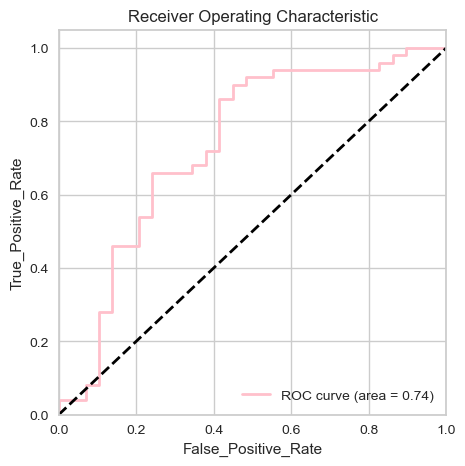

In [262]:
#PLOTTING ROC CURVE

plt.figure()
plt.plot(falseposrate, trueposrate, color='pink', lw=2, label='ROC curve (area = %0.2f)' % ROCauc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC curve area is 74%

# Decision tree

In [167]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [168]:
print("accuracy "+ str(accuracy_score(Y_test,DT.predict(X_test))))
print("precision "+ str(precision_score(Y_test,DT.predict(X_test))))
print("recall "+ str(recall_score(Y_test,DT.predict(X_test))))
print("f1 "+ str(f1_score(Y_test,DT.predict(X_test))))

accuracy 0.7721518987341772
precision 0.7818181818181819
recall 0.8775510204081632
f1 0.8269230769230769


#### CONFUSION MATRIX

In [169]:
confusion_matrix(Y_test,DT.predict(X_test))

array([[18, 12],
       [ 6, 43]], dtype=int64)

##### GridSearchCV

In [197]:
# Creating the parameter grid for Decision tree
partuneDT = {'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

HP_DTgrid=GridSearchCV(DT,partuneDT,cv=5)
HP_DTgrid.fit(X_train,Y_train)

#Evaluation
DecPred=HP_DTgrid.predict(X_test)
Dec_accuracy=accuracy_score(Y_test,DecPred)

In [198]:
DecPred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [199]:
Dec_accuracy

0.8227848101265823

### ROC CURVE

In [268]:
# Predicting using X_test data

yscore = DT.predict_proba(X_test)[:, 1]

In [269]:
#Calculate ROC curve

falseposrate1, trueposrate1, threshold = roc_curve(Y_test, yscore)

In [270]:
ROCauc = auc(falseposrate1, trueposrate1)

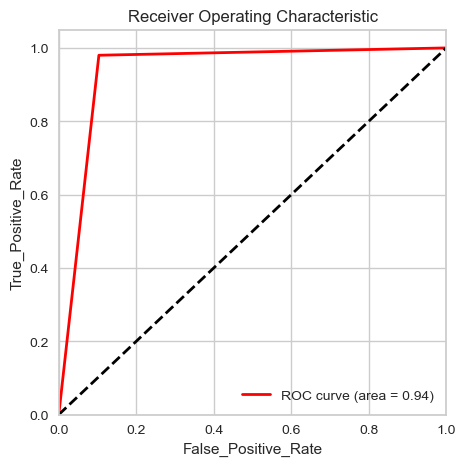

In [271]:
#PLOTTING ROC CURVE

plt.figure()
plt.plot(falseposrate1, trueposrate1, color='red', lw=2, label='ROC curve (area = %0.2f)' % ROCauc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC curve area is 94%

# Random Forest

In [170]:
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [171]:
print("accuracy "+ str(accuracy_score(Y_test,RF.predict(X_test))))
print("precision "+ str(precision_score(Y_test,RF.predict(X_test))))
print("recall "+ str(recall_score(Y_test,RF.predict(X_test))))
print("f1 "+ str(f1_score(Y_test,RF.predict(X_test))))

accuracy 0.8860759493670886
precision 0.8846153846153846
recall 0.9387755102040817
f1 0.9108910891089108


#### CONFUSION MATRIX

In [191]:
confusion_matrix(Y_test,RF.predict(X_test))

array([[24,  6],
       [ 3, 46]], dtype=int64)

### Hyperparameter tuning - GridSearchCV

In [200]:
# Creating the parameter grid for Random Forest
partuneRF = {'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10], 'n_estimators': [10, 50, 100],'min_samples_leaf': [1, 2, 4]}

HP_RFgrid=GridSearchCV(RF,partuneRF,cv=5)
HP_RFgrid.fit(X_train,Y_train)

#Evaluation
RforestPred=HP_RFgrid.predict(X_test)
RForest_accuracy=accuracy_score(Y_test,RforestPred)

In [201]:
RforestPred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [202]:
RForest_accuracy

0.9113924050632911

### ROC CURVE 

In [273]:
# Predicting using X_test data

yscore = RF.predict_proba(X_test)[:, 1]

In [274]:
#Calculate ROC curve

falseposrate2, trueposrate2, threshold = roc_curve(Y_test, yscore)

In [275]:
ROCauc = auc(falseposrate2, trueposrate2)

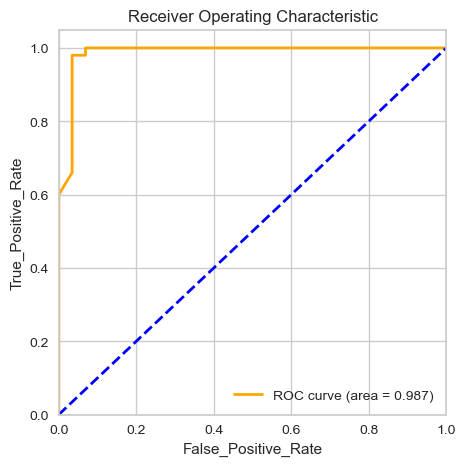

In [281]:
#PLOTTING ROC CURVE

plt.figure()
plt.plot(falseposrate2, trueposrate2, color='orange', lw=2, label='ROC curve (area = %0.3f)' % ROCauc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC curve area is ~99%

# Accuracy of all the three models

In [179]:
print("Accuracy for Logistic Regression = "+ str(accuracy_score(Y_test,reg.predict(X_test))))
print("Accuracy for Decision tree model = "+ str(accuracy_score(Y_test,DT.predict(X_test))))
print("Accuracy for Random forest model = "+ str(accuracy_score(Y_test,RF.predict(X_test))))

Accuracy for Logistic Regression = 0.7721518987341772
Accuracy for Decision tree model = 0.7721518987341772
Accuracy for Random forest model = 0.8860759493670886


## CONCLUSION:

After analyzing the accuracy of the three models employing training, testing, and validation datasets, it is evident that the Random Forest model is more accurate than the Decision Tree and Logistic Regression models. Accuracy, Precision, Recall, and F1-score are calculated in this research and compared between the three models. Statistics testing verified that the Random forest model performed well on untested data, indicating good generalization capabilities. Therefore, the Random forest model is the best approach for the selected project.

REFERENES:

Pearson’s Correlation Coefficient. (n.d.). Statistics Solutions. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient
